In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from prescribed.utils import prepare_template

In [15]:
template = (
    prepare_template("/mnt/sherlock/oak/prescribed_data/geoms/templates/template.tif")
    .groupby("grid_id")
    .first()
)

# Load MTBS data
mtbs = gpd.read_file(
    "/mnt/sherlock/oak/prescribed_data/geoms/mtbs_perims_DD_updated/mtbs_perims_DD.shp"
).to_crs(epsg=3310)
mtbs_ca = mtbs[mtbs.Event_ID.str.startswith("CA")]

# Transform date into a datetime object
mtbs_ca["Ig_Date"] = pd.to_datetime(mtbs_ca["Ig_Date"])
mtbs_ca["year"] = mtbs_ca["Ig_Date"].dt.year

# Load California boundaries
ca = gpd.read_file(
    "/mnt/sherlock/oak/prescribed_data/geoms/california_geom/datacalifornia_geom.shp"
).to_crs("3310")

# Load landtypes
land_type = pd.read_feather(
    "/mnt/sherlock/oak/prescribed_data/processed/land_type/land_type.feather"
)

# Transform to a GeoDataFrame
land_type = gpd.GeoDataFrame(
    land_type,
    geometry=gpd.points_from_xy(land_type.lon, land_type.lat),
    crs="EPSG:3310",
)

/home/topcat/miniforge3/envs/prescribed/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(-419656.7226858785, 586687.1176955621, -657535.738647496, 502899.66059872886)

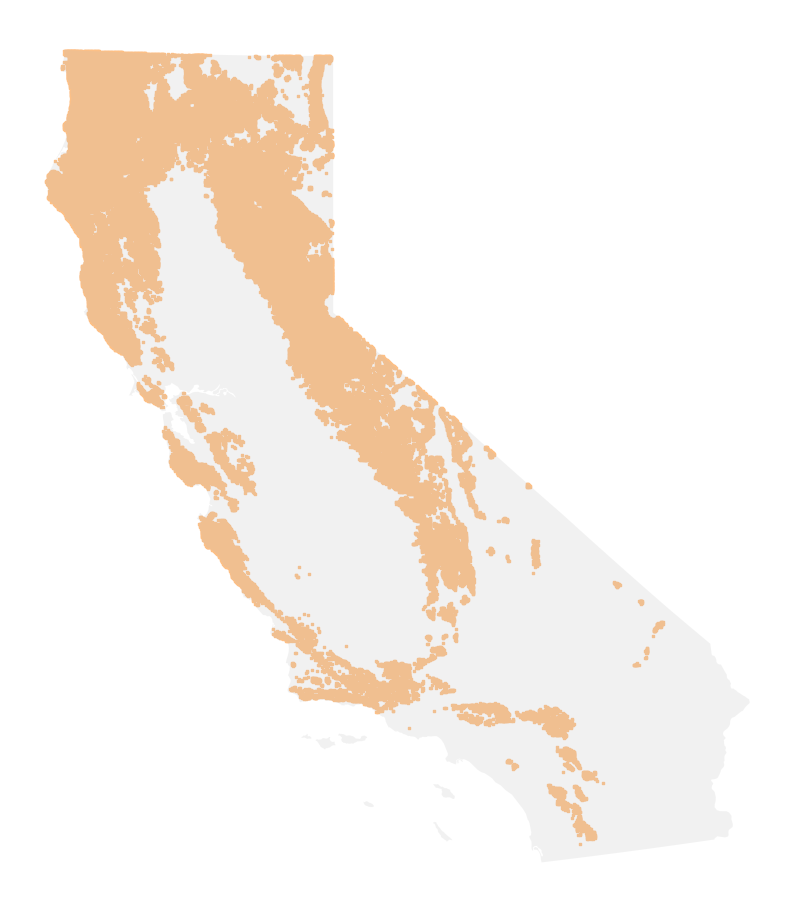

In [18]:
fig, ax = plt.subplots(figsize=(10, 15))
land_type[land_type.land_type == 2.0].plot(
ax=ax, marker=",", markersize=0.6, color="#fdc086")

ca.plot(ax=ax, color="#bdbdbd", alpha=0.2)

# # Remove the axis labels and lines
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

(-419656.7226858785, 586687.1176955621, -657535.738647496, 502899.66059872886)

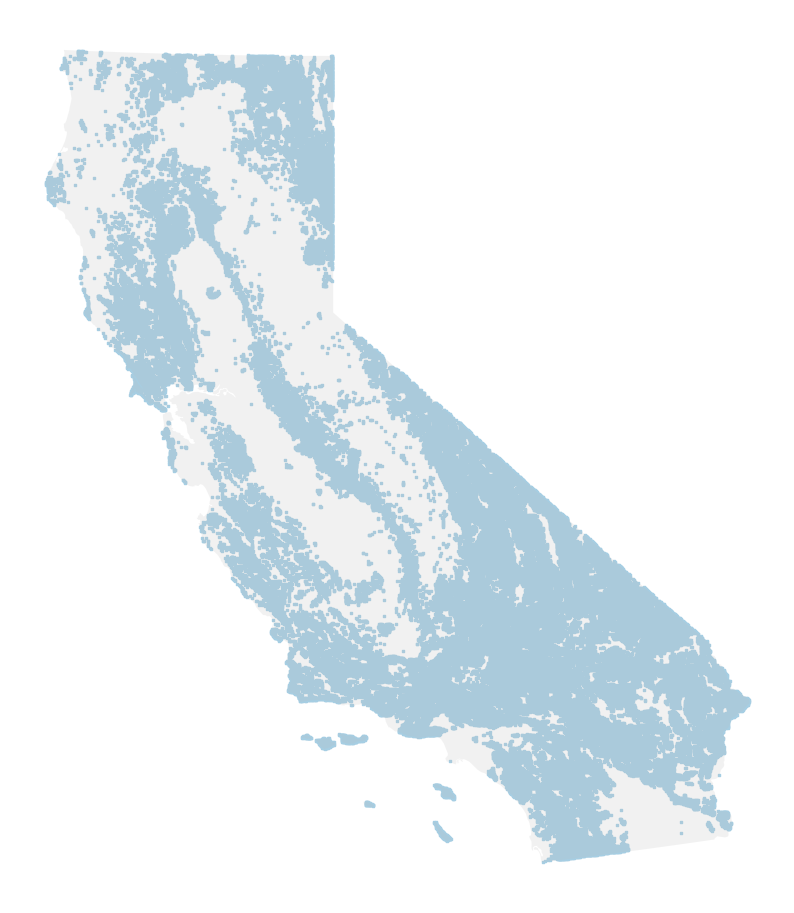

In [20]:
fig, ax = plt.subplots(figsize=(10, 15))
land_type[land_type.land_type == 12.0].plot(
ax=ax, marker=",", markersize=0.6, color="#a6cee3")

ca.plot(ax=ax, color="#bdbdbd", alpha=0.2)

# # Remove the axis labels and lines
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

In [10]:
wide_treats = pd.read_feather(
    "/mnt/sherlock/oak/prescribed_data/processed/wide_treatments/wide_treats.feather"
)
wide_treats

,grid_id,treat_2000,treat_2001,treat_2002,treat_2003,treat_2004,treat_2005,treat_2006,treat_2007,treat_2008,...,class_frp_2014,class_frp_2015,class_frp_2016,class_frp_2017,class_frp_2018,class_frp_2019,class_frp_2020,class_frp_2021,class_frp_2022,class_frp_2023
0,941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407550,966112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407551,966113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407552,966114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407553,966115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Transform  the treat_2020 column in wide_treats to a geopandas dataset
# with the same geometry as the template
test_treat = wide_treats[
    ["grid_id", "treat_2020", "class_dnbr_2020", "class_frp_2020"]
].copy()
test_treat = test_treat.merge(template, on="grid_id")

# Define the treat lows with dnbr and frp
low_treat = 1
test_treat["treat_low_frp"] = test_treat["class_frp_2020"] * test_treat["treat_2020"]
test_treat["treat_low_frp"] = np.where(test_treat["treat_low_frp"] == low_treat, 1, 0)

low_treat = 2
test_treat["treat_low_dnbr"] = test_treat["class_dnbr_2020"] * test_treat["treat_2020"]
test_treat["treat_low_dnbr"] = np.where(
    test_treat["treat_low_dnbr"] == 2, 1, 0)

# Transform lat/lon column into a geometry in geopandas
test_treat = gpd.GeoDataFrame(
    test_treat,
    geometry=gpd.points_from_xy(test_treat.lon, test_treat.lat),
    crs="EPSG:3310",
)

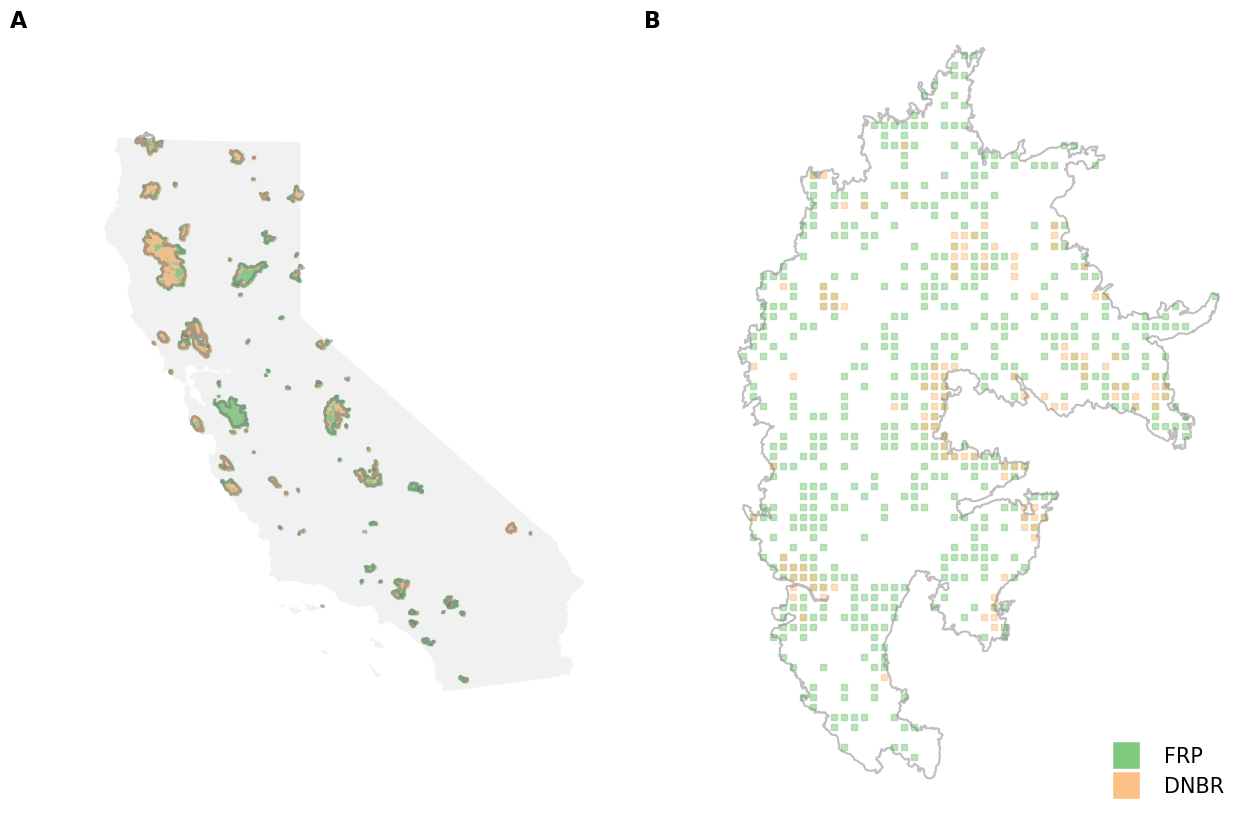

In [14]:
ids = "CA3720111927220200905"

fig, ax = plt.subplots(1, 2, figsize=(15, 20))

# Plot all fires and treatments
mtbs_ca[(mtbs_ca.year == 2020) & (mtbs_ca.Incid_Type == "Wildfire")].boundary.plot(
    ax=ax[0], color="#737373", alpha=0.5
)
test_treat[test_treat.treat_low_frp == 1].plot(
    ax=ax[0], marker=",", color="#7fc97f", legend=False, alpha=0.5, markersize=1
)

test_treat[test_treat.treat_low_dnbr == 1].plot(
    ax=ax[0], marker=",", color="#fdc086", legend=False, alpha=0.5, markersize=1
)

ca.plot(ax=ax[0], color="#bdbdbd", alpha=0.2)

# # Remove the axis labels and lines
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].axis("off")
ax[0].text(
        -1.3,
        1,
        "A",
        transform=ax[1].transAxes,
        fontsize=16,
        fontweight="bold",
        va="top",
        ha="right",
    )


# Subset treatments to the fire event
fire_points = test_treat[
    test_treat.geometry.within(
        mtbs_ca[mtbs_ca.Event_ID == ids].iloc[0].geometry
    )
]

# Plot event id with treatments
mtbs_ca[mtbs_ca.Event_ID == ids].boundary.plot(
    ax=ax[1], color="gray", alpha=0.5
)

fire_points[fire_points.treat_low_frp == 1].plot(
    ax=ax[1], marker=",", color="#7fc97f", legend=False, alpha=0.5, markersize=15
)

fire_points[fire_points.treat_low_dnbr == 1].plot(
    ax=ax[1], marker=",", color="#fdc086", legend=False, alpha=0.5, markersize=15
)

ax[1].legend(
    [
        plt.Line2D(
            [1], [0], marker="s", color="w", markerfacecolor="#7fc97f", markersize=20
        ),
        plt.Line2D(
            [0], [0], marker="s", color="w", markerfacecolor="#fdc086", markersize=20
        ),
    ],
    ["FRP", "DNBR"],
    fontsize=15,
    frameon=False,
    loc="lower right",
)

# # Remove the axis labels and lines
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].axis("off")
ax[1].text(
        -0.1,
        1,
        "B",
        transform=ax[1].transAxes,
        fontsize=16,
        fontweight="bold",
        va="top",
        ha="right",
    )


#Save plot in high resolution
plt.savefig(
    "../figs/treatments.png",
    dpi=300,
    bbox_inches="tight",
)

## Some plots and descriptives

### How many times pixels reburn? That's a good question! 

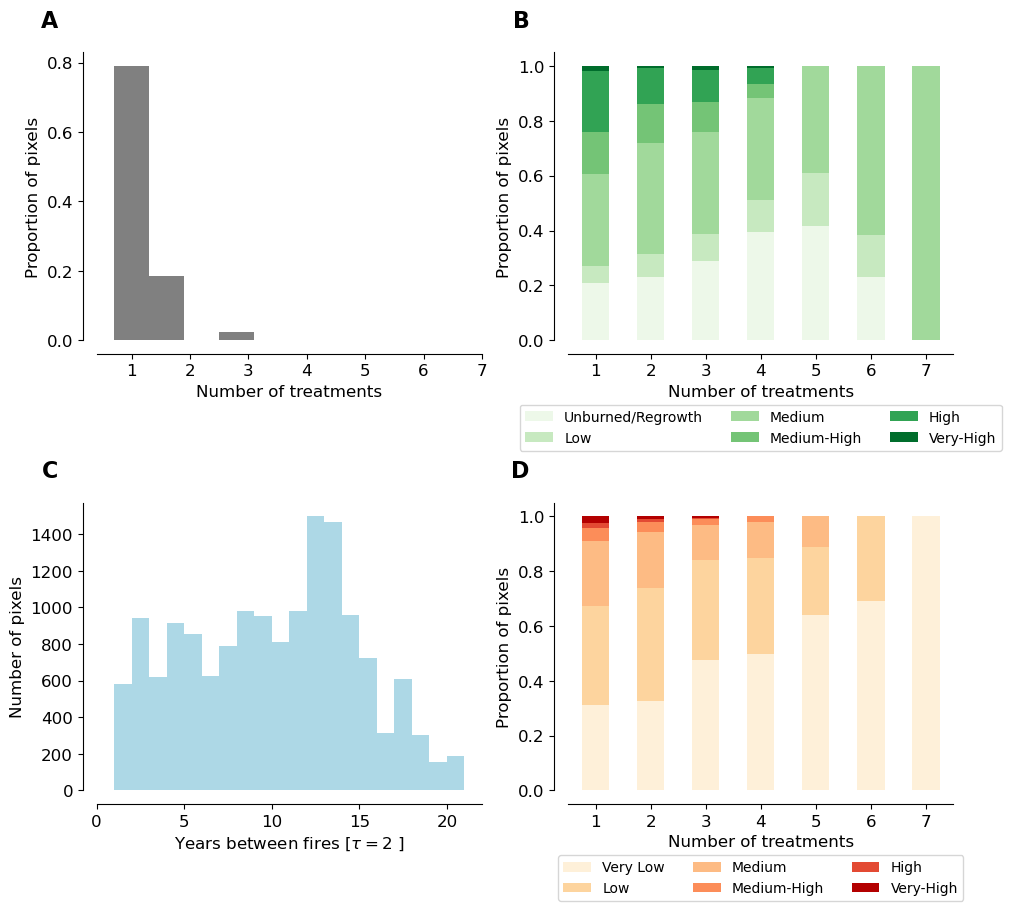

In [20]:
def delta_fire(group):
    return pd.DataFrame(
        {
            "min_year": group[group.treat == 1].year.min(),
            "max_year": group[group.treat == 1].year.max(),
            "delta_year": group[group.treat == 1].year.max()
            - group[group.treat == 1].year.min(),
        },
        index=[0],
    )


# Big figure
fig, axd = plt.subplot_mosaic(
    [["upper left", "upper right"], ["lower left", "lower right"]],
    figsize=(10, 9),
    layout="constrained",
)
g = wildfires[wildfires.count_treats == 2].groupby("grid_id")
df = g.apply(delta_fire)
df.delta_year.hist(bins=20, ax=axd["lower left"], grid=False, color="lightblue")

axd["lower left"].set_xlabel(r"Years between fires [$\tau = 2$ ]", fontsize=12)
axd["lower left"].set_ylabel("Number of pixels", fontsize=12)

# Get the proportion of pixels in each number of treatments.
df = wildfires[wildfires.count_treats > 0]

hist, bins = np.histogram(df.count_treats.values)
axd["upper left"].bar(
    bins[:-1],
    hist.astype(np.float32) / hist.sum(),
    width=(bins[1] - bins[0]),
    color="grey",
)
# Change label name in the first axis
axd["upper left"].set_xlabel("Number of treatments", fontsize=12)
axd["upper left"].set_ylabel("Proportion of pixels", fontsize=12)


# Proporiton of pixels in each FRP class
props = df.groupby(["count_treats", "first_frp"], as_index=False).grid_id.count()
props["prop"] = props.grid_id / props.groupby(["count_treats"]).grid_id.transform("sum")
props.sort_values(by=["count_treats"])

# Reshape the to have counter per first_frp columns
props = props.pivot(index="count_treats", columns="first_frp", values="prop").fillna(0)
props.columns = ["Very Low", "Low", "Medium", "Medium-High", "High", "Very-High"]

# Plot it!
props.plot.bar(
    rot=0,
    stacked=True,
    ax=axd["lower right"],
    color=["#fef0d9", "#fdd49e", "#fdbb84", "#fc8d59", "#e34a33", "#b30000"],
)

# Change legend labels
axd["lower right"].legend(
    # title="First FRP class",
    # title_fontsize="12",
    # fontsize="10",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=3,
)

axd["lower right"].set_xlabel("Number of treatments", fontsize=12)
axd["lower right"].set_ylabel("Proportion of pixels", fontsize=12)


# Now do the same plot but for severity
props = df.groupby(["count_treats", "first_dnbr"], as_index=False).grid_id.count()
props["prop"] = props.grid_id / props.groupby(["count_treats"]).grid_id.transform("sum")

props = props.pivot(index="count_treats", columns="first_dnbr", values="prop").fillna(0)
props.columns = [
    "Unburned/Regrowth",
    "Low",
    "Medium",
    "Medium-High",
    "High",
    "Very-High",
]

props.plot.bar(
    rot=0,
    stacked=True,
    ax=axd["upper right"],
    color=["#edf8e9", "#c7e9c0", "#a1d99b", "#74c476", "#31a354", "#006d2c"],
)

axd["upper right"].set_xlabel("Number of treatments", fontsize=12)
axd["upper right"].set_ylabel("Proportion of pixels", fontsize=12)

# Change legend labels
axd["upper right"].legend(
    # title="First FRP class",
    # title_fontsize="12",
    # fontsize="10",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=3,
)

# Loop over axis
subtitles = ["A", "B", "C", "D"]
for i, ax in enumerate(fig.axes):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines.left.set_position(("outward", 10))
    ax.spines.bottom.set_position(("outward", 10))
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.tick_params(axis="both", which="major", labelsize=12)
    ax.text(
        -0.1,
        1.15,
        subtitles[i],
        transform=ax.transAxes,
        fontsize=16,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Save plot in high resolution
plt.savefig(
    "../figs/delta_years_treatment.png",
    dpi=300,
    bbox_inches="tight",
)

### How the treatments look like? 

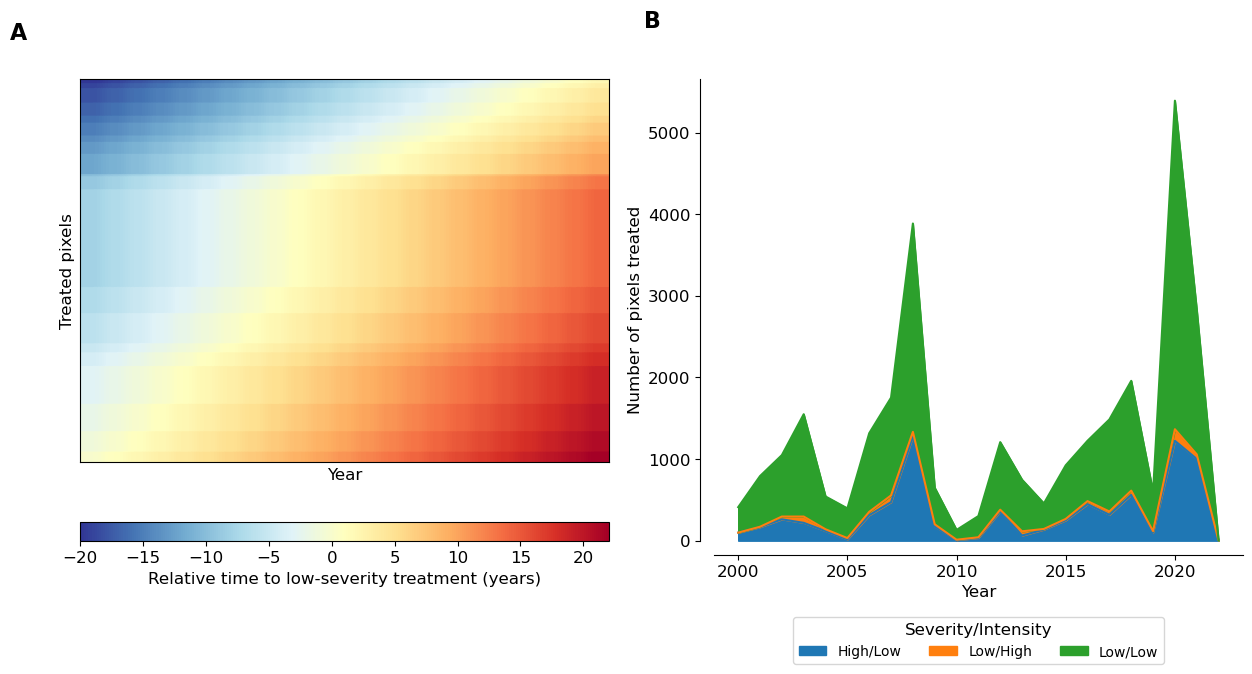

In [21]:
# Modify data frame columns for plot!
wildfires_plot = wildfires[(wildfires.count_treats == 2)].copy()
wildfires_plot["low_severity"] = np.where(wildfires_plot.first_dnbr <= 2, 1, 0)
wildfires_plot["low_intensity"] = np.where(wildfires_plot.first_frp <= 2, 1, 0)

wildfires_plot["low_severity_treat"] = (
    wildfires_plot.low_severity * wildfires_plot.treat
)
wildfires_plot["low_intensity_treat"] = (
    wildfires_plot.low_intensity * wildfires_plot.treat
)

wildfires_plot["rel_year"] = wildfires_plot["rel_year"].fillna(0)
# wildfires_plot = wildfires_plot[wildfires_plot.treat == 1]

# Pivot the dataframe to plot the heatmap as a numpy array
arr_treats = (
    wildfires_plot.pivot(index="grid_id", columns="year", values="rel_year")
    .fillna(0)
    .values
)

# Remove all rows from array that sum to zero
arr_treats = arr_treats[arr_treats.sum(axis=1) != 0]
arr_treats = arr_treats[np.argsort(arr_treats.sum(axis=1))]

# Plot treeatment assignment and relative time as a heatmap
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
im = axs[0].imshow(arr_treats, aspect="auto", cmap="RdYlBu_r")

# Remove axes
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_xlabel("Year", fontsize=12)
axs[0].set_ylabel("Treated pixels", fontsize=12)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

#  Change position color bar to bottom of the plot
divider = make_axes_locatable(axs[0])
cax = divider.new_vertical(size="5%", pad=0.6, pack_start=True)
fig.add_axes(cax)

# Add color bar at the bottom of plot
cbar = plt.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Relative time to low-severity treatment (years)", fontsize=12)
cbar.ax.tick_params(labelsize=12)

# Add plot severity/intensity treatments
agg = (
    wildfires_plot.groupby(
        ["low_severity_treat", "low_intensity_treat", "year"], as_index=False
    )
    .grid_id.count()
    .pivot(
        index="year",
        columns=["low_severity_treat", "low_intensity_treat"],
        values="grid_id",
    )
)

# Plot the combination
agg.loc[:, [(0, 1), (1, 0), (1, 1)]].plot.area(ax=axs[1])

# Spine the plot in a cute way
axs[1].spines["left"].set_visible(True)
axs[1].spines["bottom"].set_visible(True)
axs[1].spines.left.set_position(("outward", 10))
axs[1].spines.bottom.set_position(("outward", 10))
axs[1].yaxis.set_ticks_position("left")
axs[1].xaxis.set_ticks_position("bottom")
axs[1].tick_params(axis="both", which="major", labelsize=12)

# Change axis labels
axs[1].set_xlabel("Year", fontsize=12)
axs[1].set_ylabel("Number of pixels treated", fontsize=12)

# Get legends from default plotting
lines, labels = axs[1].get_legend_handles_labels()

# Change legend values to coincide with the plot colors
axs[1].legend(
    labels=["High/Low", "Low/High", "Low/Low"],
    handles=lines,
    title="Severity/Intensity",
    title_fontsize="12",
    fontsize="10",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
)

# Loop over axis
subtitles = ["A", "B"]
for i, ax in enumerate(axs):
    ax.text(
        -0.1,
        1.15,
        subtitles[i],
        transform=ax.transAxes,
        fontsize=16,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Save plot in high resolution
plt.savefig(
    "../figs/heatmap_treatments.png",
    dpi=300,
    bbox_inches="tight",
)

In [269]:
mtbs = gpd.read_file(
    "/mnt/sherlock/oak/prescribed_data/geoms/mtbs_perims_DD_updated/mtbs_perims_DD.shp"
)

mtbs[
    (mtbs.Incid_Type == "Wildfire") & (mtbs.Event_ID.str.startswith("CA"))
].sort_values("BurnBndAc", ascending=False).head(20)

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry
29307,CA3966012280920200817,EE343B88-0ADB-4C25-B744-6B4CE9DCC6DA,AUGUST COMPLEX,Wildfire,10021108,MTBS,Extended,1068802,39.94,-123.03,...,804503220201019,37,34,-970,-150,110,309,550,"CA4012512307320200818, CA4008712298420200819, ...","POLYGON ((-122.86087 39.49303, -122.86084 39.4..."
30266,CA3987612137920210714,E9DB628D-DFB7-4C85-BCD6-1254574D946B,DIXIE,Wildfire,10023957,MTBS,Extended,979795,40.323,-120.865,...,None,-14,35,-970,-150,70,304,570,Burn scar to the east was burnt slightly earli...,"MULTIPOLYGON (((-120.48410 40.27266, -120.4838..."
27410,CA3924012311020180727,25B938AB-3047-4D7B-ADE3-FD752F156F7C,RANCH,Wildfire,10014566,MTBS,Extended,427048,39.269,-122.775,...,None,-24,36,-970,-150,55,302,575,Used modified geomac perimeter.,"POLYGON ((-122.68854 39.51925, -122.68845 39.5..."
29324,CA3742412156820200816,871C357C-444E-437E-AD4D-EBDAF39C3AD6,SCU LIGHTNING COMPLEX,Wildfire,10021184,MTBS,Initial,405787,37.493,-121.5,...,None,52,43,-970,-150,90,350,640,4-4 fire is included in this complex.,"MULTIPOLYGON (((-121.86486 37.51712, -121.8644..."
29131,CA3720111927220200905,33CBB9DC-6983-4F47-B821-9C9A6CAC381D,CREEK,Wildfire,10020469,MTBS,Extended,381441,37.317,-119.214,...,None,36,36,-970,-150,65,324,610,None,"POLYGON ((-119.39124 37.15000, -119.39144 37.1..."
29266,CA4009112093120200817,6701B25B-7005-4C57-8577-96E15AC213C4,NORTH COMPLEX,Wildfire,10020999,MTBS,Extended,316556,39.725,-121.127,...,804403220201012,29,22,-970,-150,90,328,600,Complex includes Baer and Claremont fires.,"MULTIPOLYGON (((-121.42921 39.54718, -121.4286..."
29306,CA3850412233720200817,AB8C9F13-A691-48C7-8BF6-3A4A5946F0EF,HENNESSEY,Wildfire,10021102,MTBS,Extended,314241,38.623,-122.283,...,None,61,43,-970,-150,90,296,540,None,"POLYGON ((-122.49785 38.64292, -122.49793 38.6..."
18984,CA4062112015220120812,None,RUSH,Wildfire,1463,MTBS,Initial,306811,40.603,-120.09,...,None,22,-9999,-970,-150,50,302,580,None,"POLYGON ((-119.98304 40.91256, -119.98319 40.9..."
25458,CA3442911910020171205,943D8086-7DF4-47C7-BB98-A358E962667E,THOMAS,Wildfire,10008148,MTBS,Extended,281982,34.459,-119.303,...,None,6,32,-970,-150,100,300,700,Used modified GeoMac perimeter.,"POLYGON ((-119.35345 34.39726, -119.35325 34.3..."
10142,CA3293911676620031025,None,CEDAR,Wildfire,12953,MTBS,Extended,268362,32.939,-116.766,...,None,30,-9999,-970,-150,100,197,350,None,"POLYGON ((-116.94275 32.91425, -116.94309 32.9..."


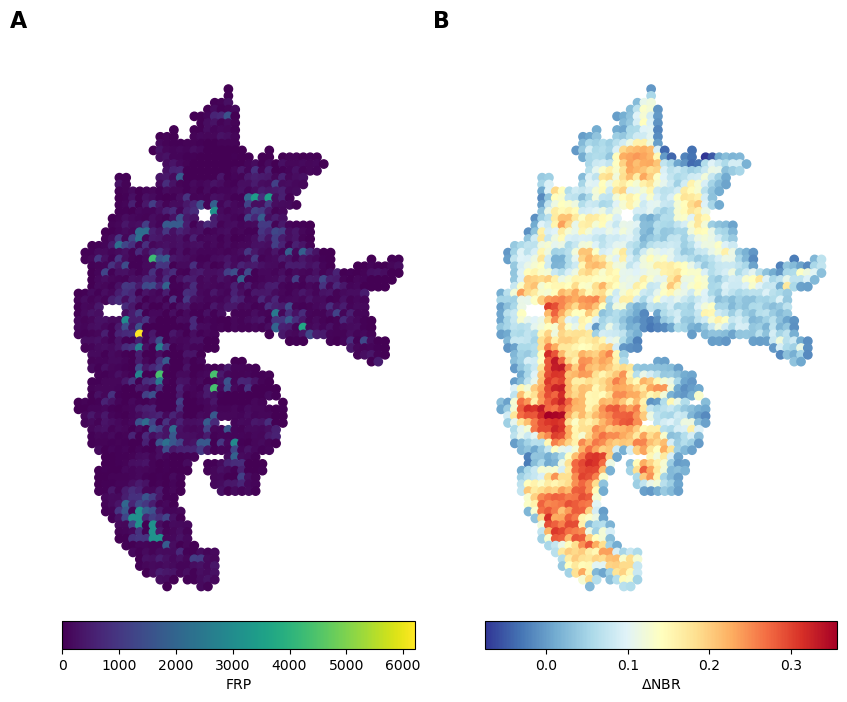

In [54]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ids = wildfires[wildfires.Event_ID == "CA3720111927220200905"]

# Tranform ids to geopandas dataframe
ids = gpd.GeoDataFrame(ids, geometry=gpd.points_from_xy(ids.lon, ids.lat))
ids.crs = "EPSG:3310"

fig, ax = plt.subplots(1, 2, figsize=(10, 15))

# Take care of the colorbar size
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="5%", pad=0.1)

# Plot with divergent color scheme
ids.plot(
    column="frp",
    legend=True,
    cmap="viridis",
    ax=ax[0],
    cax=cax,
    legend_kwds={"label": "FRP", "orientation": "horizontal"},
)


# # Remove the axis labels and lines
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].axis("off")


# Take care of the colorbar size
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("bottom", size="5%", pad=0.1)

# Plot with divergent color scheme
ids.plot(
    column="dnbr",
    legend=True,
    cmap="RdYlBu_r",
    ax=ax[1],
    cax=cax,
    legend_kwds={"label": r"$\Delta$NBR", "orientation": "horizontal"},
)


# # Remove the axis labels and lines
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].axis("off")

# Loop over axis
subtitles = ["A", "B"]
for i, a in enumerate(ax):
    ax[i].text(
        -0.1,
        1.10,
        subtitles[i],
        transform=ax[i].transAxes,
        fontsize=16,
        fontweight="bold",
        va="top",
        ha="right",
    )

# Save plot in high resolution
plt.savefig(
    "../figs/data_comparison.png",
    dpi=300,
    bbox_inches="tight",
)

Text(0, 0.5, 'FRP')

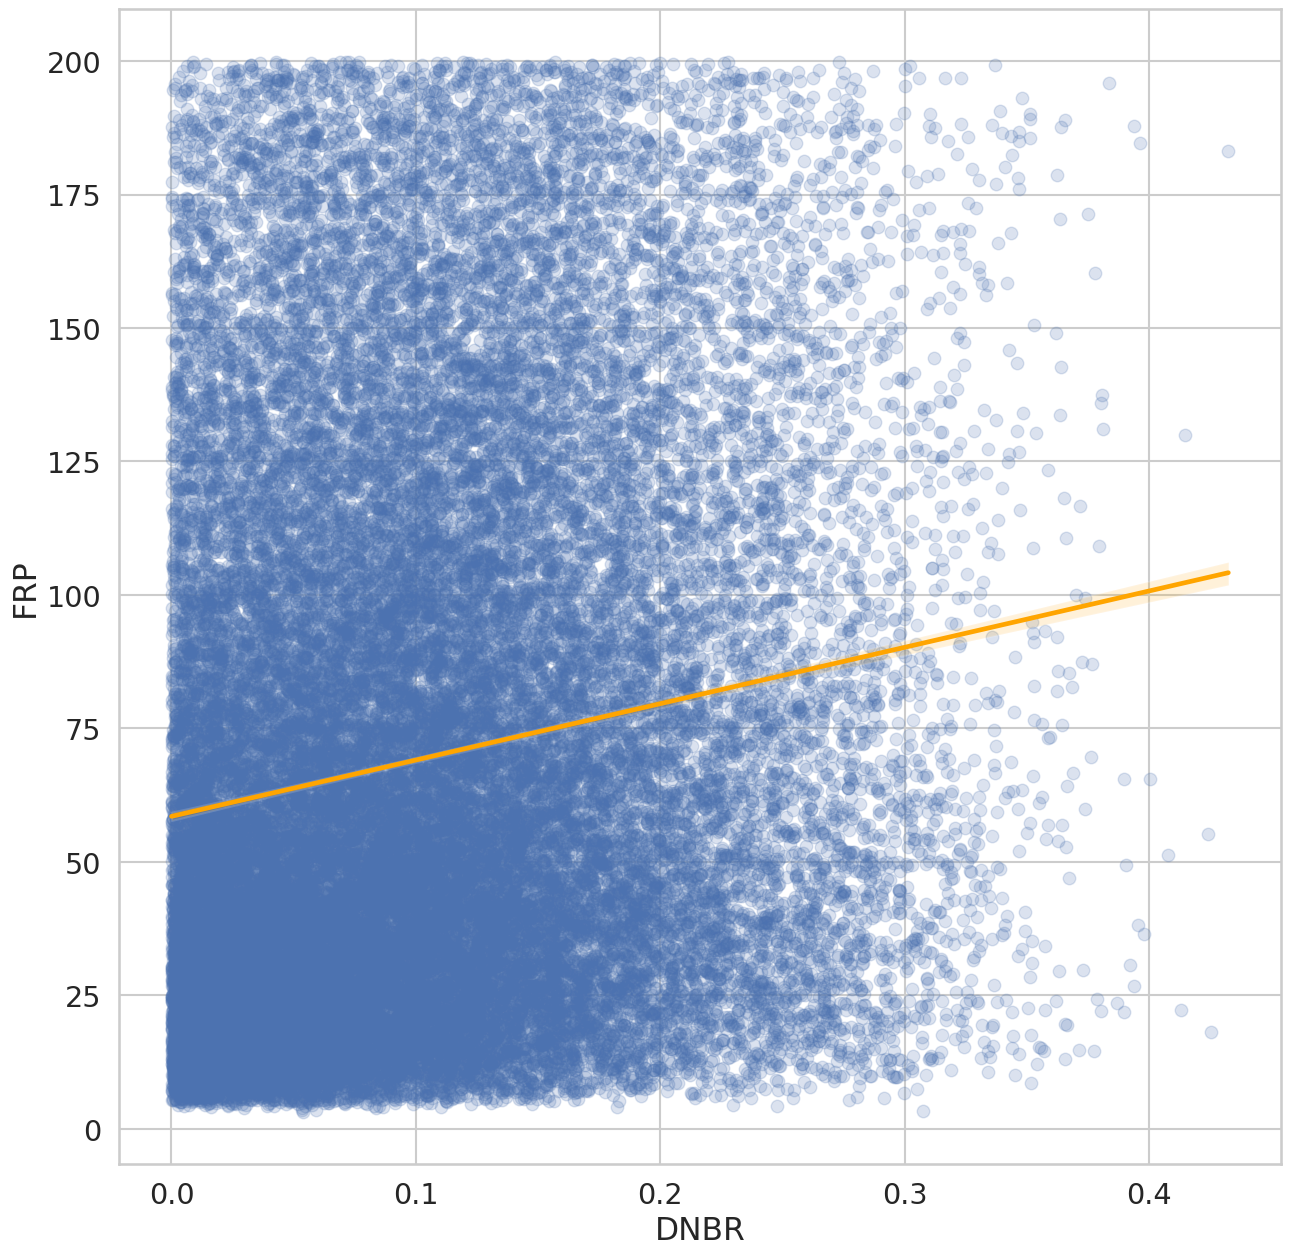

In [362]:
# increase font size of all elements
sns.set_context("talk", font_scale=1.25)
sns.set_style("whitegrid")

plt.figure(figsize=(15, 15))
sns.regplot(
    x="dnbr",
    y="frp",
    data=wildfires[(wildfires.frp > 0) & (wildfires.frp < 200) & (wildfires.dnbr > 0)],
    lowess=False,
    scatter_kws={"alpha": 0.2},
    line_kws={"color": "orange"},
)

# Change axis names
plt.xlabel("DNBR")
plt.ylabel("FRP")